Get dataframe

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../song_features.csv')
df.head()

,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genres
0,0HZk0QsXPhMNAWNDR3rYE8,0.4700,0.364,0.378,0.0,7,0.3390,-7.381,0,0.0331,89.918,3,0.366,a-cappella
1,6tkbKjaHRL2ZG5wtmHzXgn,0.7640,0.556,0.412,0.0,7,0.0902,-10.224,1,0.0992,84.778,4,0.811,a-cappella
2,4z8sz6E4YyFuEkv5o7IJni,0.3020,0.497,0.312,0.0,11,0.0968,-9.088,0,0.0269,105.036,4,0.177,a-cappella
3,6XamqE26MOlAoXs1LZr8AU,0.3080,0.674,0.517,0.0,2,0.0896,-7.147,1,0.0555,120.127,4,0.476,a-cappella
4,5glU2EWqa5hpYqGPboSNjV,0.0243,0.419,0.817,0.0,2,0.2510,-4.704,1,0.0468,78.107,4,0.317,a-cappella


Heatmap to discover low correlation features

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
acousticness,1.000000,-0.421916,-0.784065,0.323526,-0.104296,-0.640456,-0.066722,-0.223505,-0.305464
danceability,-0.421916,1.000000,0.391948,-0.299802,0.001278,0.425349,0.228910,0.033849,0.533337
energy,-0.784065,0.391948,1.000000,-0.357118,0.194279,0.794030,0.085639,0.264318,0.448613
instrumentalness,0.323526,-0.299802,-0.357118,1.000000,-0.121329,-0.533992,-0.152479,-0.113529,-0.237620
liveness,-0.104296,0.001278,0.194279,-0.121329,1.000000,0.146228,0.129099,0.046717,0.069993
loudness,-0.640456,0.425349,0.794030,-0.533992,0.146228,1.000000,0.055282,0.222895,0.323491
speechiness,-0.066722,0.228910,0.085639,-0.152479,0.129099,0.055282,1.000000,0.040668,0.063647
tempo,-0.223505,0.033849,0.264318,-0.113529,0.046717,0.222895,0.040668,1.000000,0.153970
valence,-0.305464,0.533337,0.448613,-0.237620,0.069993,0.323491,0.063647,0.153970,1.000000


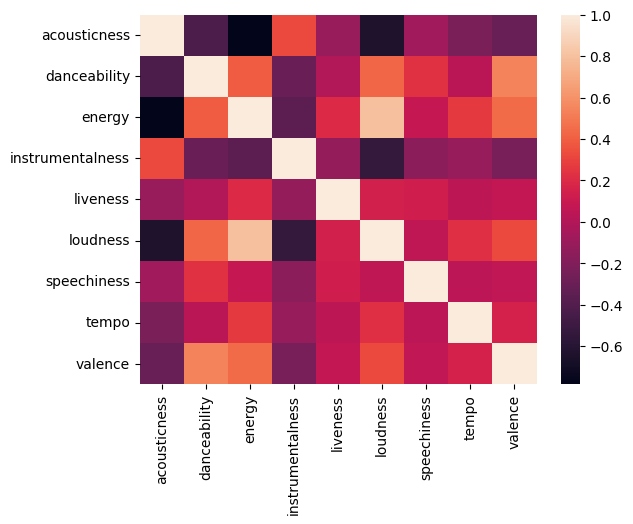

In [3]:
import seaborn as sns
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
dataplot = sns.heatmap(df[features].corr())
# List correlation values
df[features].corr()
# plt.show()

Investigate the relationship between energy and loudness since it has the highest correlation

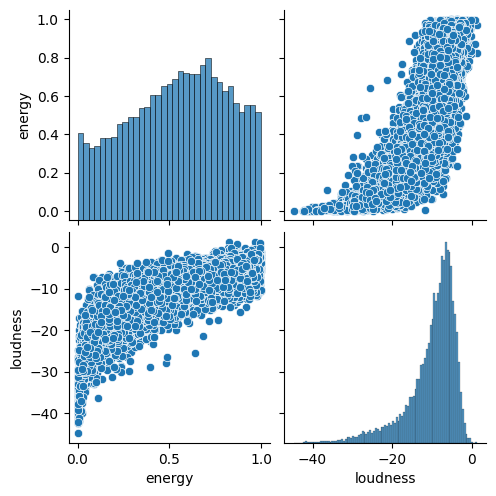

In [4]:
invest_features = ['energy', 'loudness']
data_scatter = sns.pairplot(df[invest_features])
plt.show()

Box plot for features

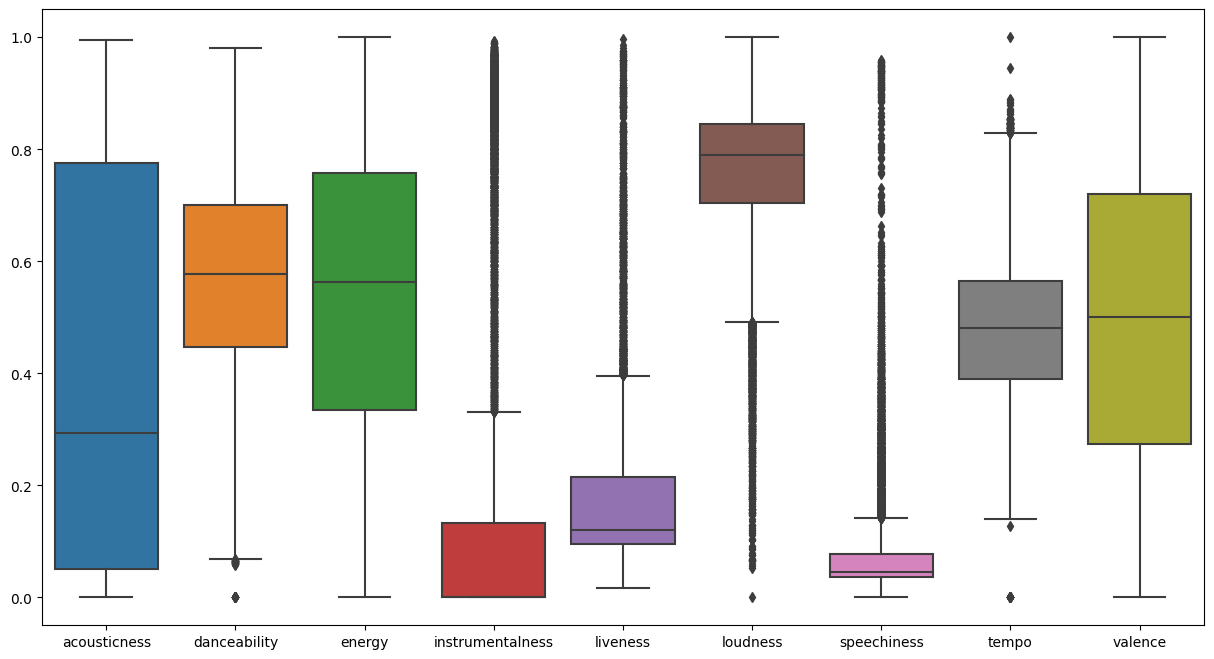

In [5]:

# Scale tempo and loudness to [0, 1]
for col in ['loudness', 'tempo']:
    df[col] = ((df[col] - df[col].min()) / (df[col].max() - df[col].min()))
sns.boxplot(data=df[features])
# Resize plot
plt.gcf().set_size_inches(15, 8)
plt.show()

Remove outliers

In [11]:
# Remove any data with tempo = 0
no_out_df = df[df['tempo'] != 0]
# Remove key, genres, id
no_out_df = no_out_df.drop(['key', 'id'], axis=1)
# # One hot encoding mode and time_signature
# no_out_df = pd.get_dummies(no_out_df, columns=['mode', 'time_signature'])
# # Rename time_signature columns
# no_out_df = no_out_df.rename(columns={'time_signature_0': 'ts_0/4', 'time_signature_1': 'ts_1/4', 'time_signature_3': 'ts_3/4', 'time_signature_4': 'ts_4/4', 'time_signature_5': 'ts_5/4'})
# Subset data to include only 500 songs per genre
sub_df = pd.DataFrame()
for genre in no_out_df['genres'].unique():
    sub_df = sub_df.append(no_out_df[no_out_df['genres'] == genre].sample(500))
sub_df.drop(['genres'], axis=1, inplace=True)
sub_df.head()

/tmp/ipykernel_4353/3717558158.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_df = sub_df.append(no_out_df[no_out_df['genres'] == genre].sample(500))
/tmp/ipykernel_4353/3717558158.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_df = sub_df.append(no_out_df[no_out_df['genres'] == genre].sample(500))
/tmp/ipykernel_4353/3717558158.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_df = sub_df.append(no_out_df[no_out_df['genres'] == genre].sample(500))
/tmp/ipykernel_4353/3717558158.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_df = sub_df.append(no_out_df[no_out_df['genres'] == genre].sample(500))
/tmp

,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,time_signature,valence
161,0.635,0.706,0.2050,0.0,0.1240,0.551266,1,0.9060,0.536101,4,0.255
10230,0.359,0.645,0.4250,0.0,0.3310,0.834327,1,0.0278,0.373605,4,0.692
155,0.965,0.351,0.0748,0.0,0.0926,0.641086,1,0.0366,0.191353,3,0.129
21,0.157,0.670,0.5380,0.0,0.3240,0.767152,1,0.0674,0.690568,4,0.838
10181,0.161,0.507,0.8140,0.0,0.2880,0.836236,0,0.2350,0.321167,4,0.501


Clustering with Hierachical Clustering

In [12]:
import gower
from sklearn.cluster import AgglomerativeClustering
distance_matrix = gower.gower_matrix(sub_df)
distance_matrix

array([[0.        , 0.23918664, 0.24363054, ..., 0.19969757, 0.3407257 ,
        0.31817064],
       [0.23918664, 0.        , 0.2508897 , ..., 0.25426492, 0.27885625,
        0.16339502],
       [0.24363054, 0.2508897 , 0.        , ..., 0.1540828 , 0.24508049,
        0.2993573 ],
       ...,
       [0.19969757, 0.25426492, 0.1540828 , ..., 0.        , 0.25879896,
        0.1903539 ],
       [0.3407257 , 0.27885625, 0.24508049, ..., 0.25879896, 0.        ,
        0.2765749 ],
       [0.31817064, 0.16339502, 0.2993573 , ..., 0.1903539 , 0.2765749 ,
        0.        ]], dtype=float32)

In [13]:
model = AgglomerativeClustering(affinity='precomputed', linkage='complete')
clusters = model.fit(distance_matrix)

In [15]:
sub_df['cluster'] = clusters.labels_
sub_df.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,time_signature,valence,cluster
161,0.635,0.706,0.2050,0.0,0.1240,0.551266,1,0.9060,0.536101,4,0.255,0
10230,0.359,0.645,0.4250,0.0,0.3310,0.834327,1,0.0278,0.373605,4,0.692,0
155,0.965,0.351,0.0748,0.0,0.0926,0.641086,1,0.0366,0.191353,3,0.129,1
21,0.157,0.670,0.5380,0.0,0.3240,0.767152,1,0.0674,0.690568,4,0.838,0
10181,0.161,0.507,0.8140,0.0,0.2880,0.836236,0,0.2350,0.321167,4,0.501,0


Investigate the clusters

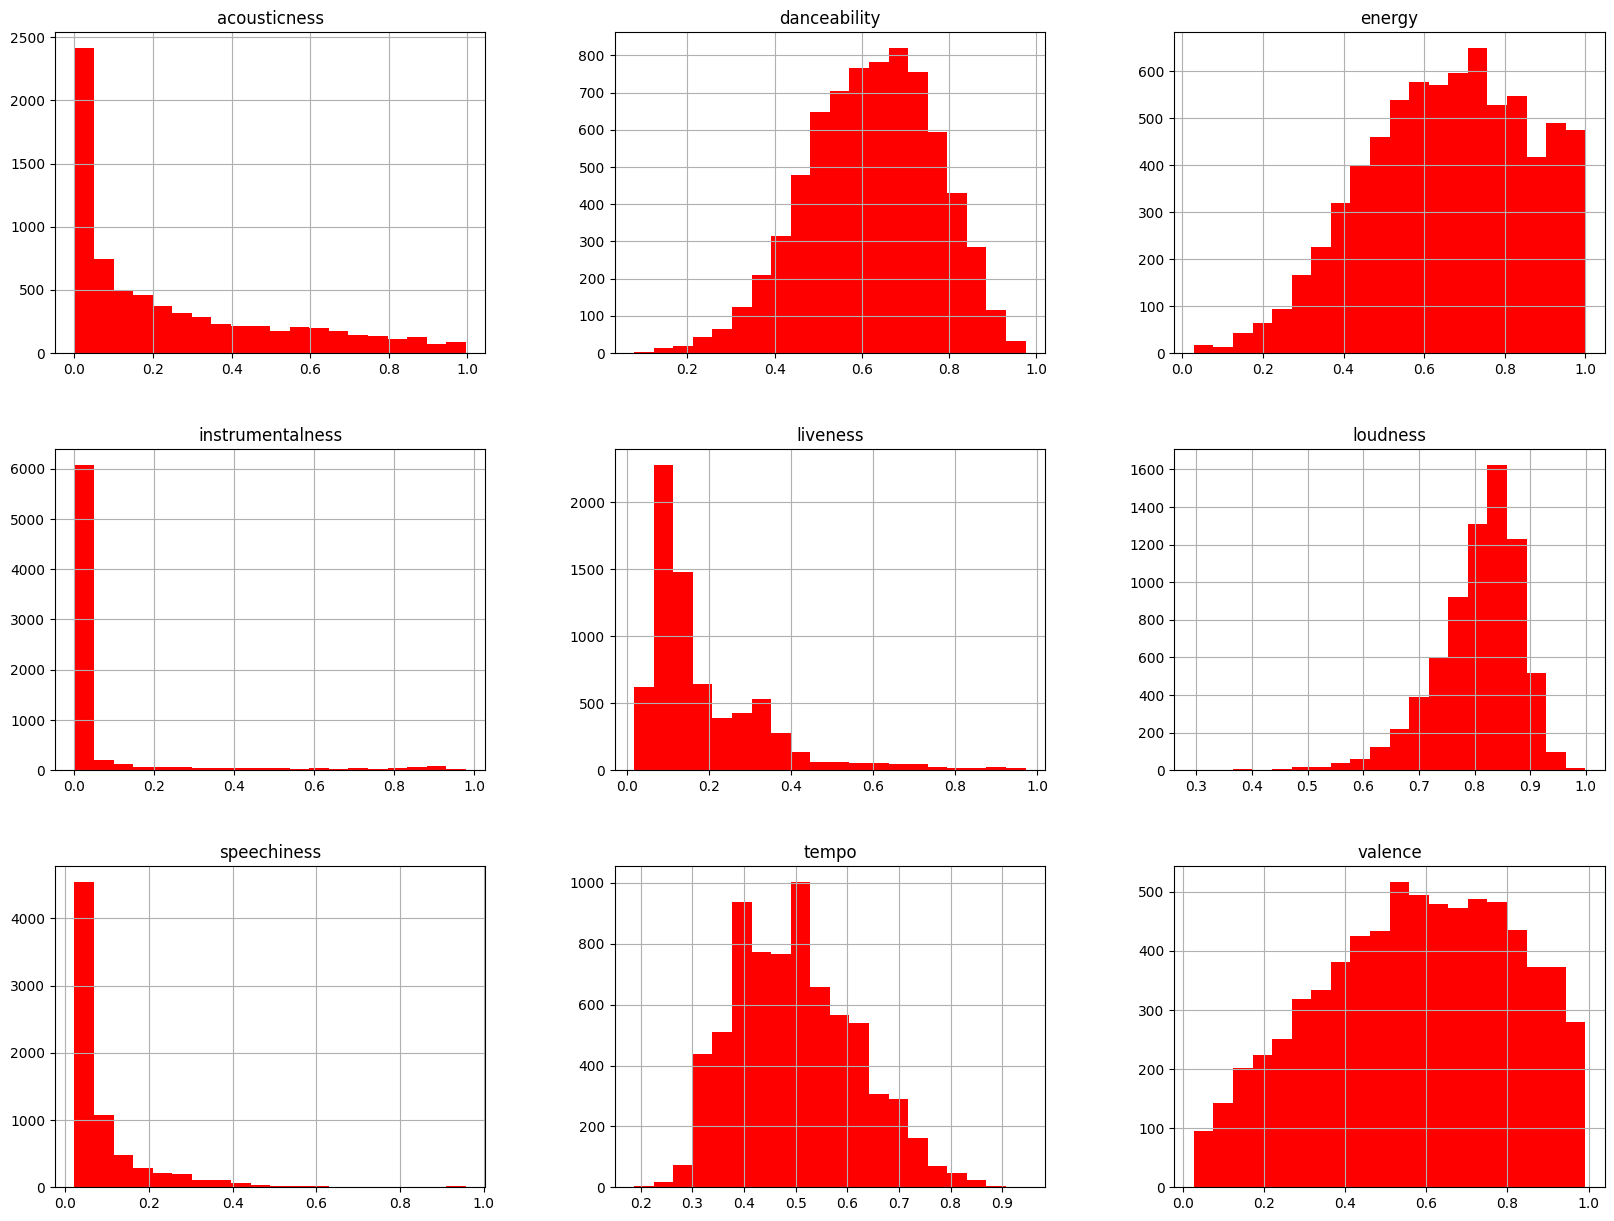

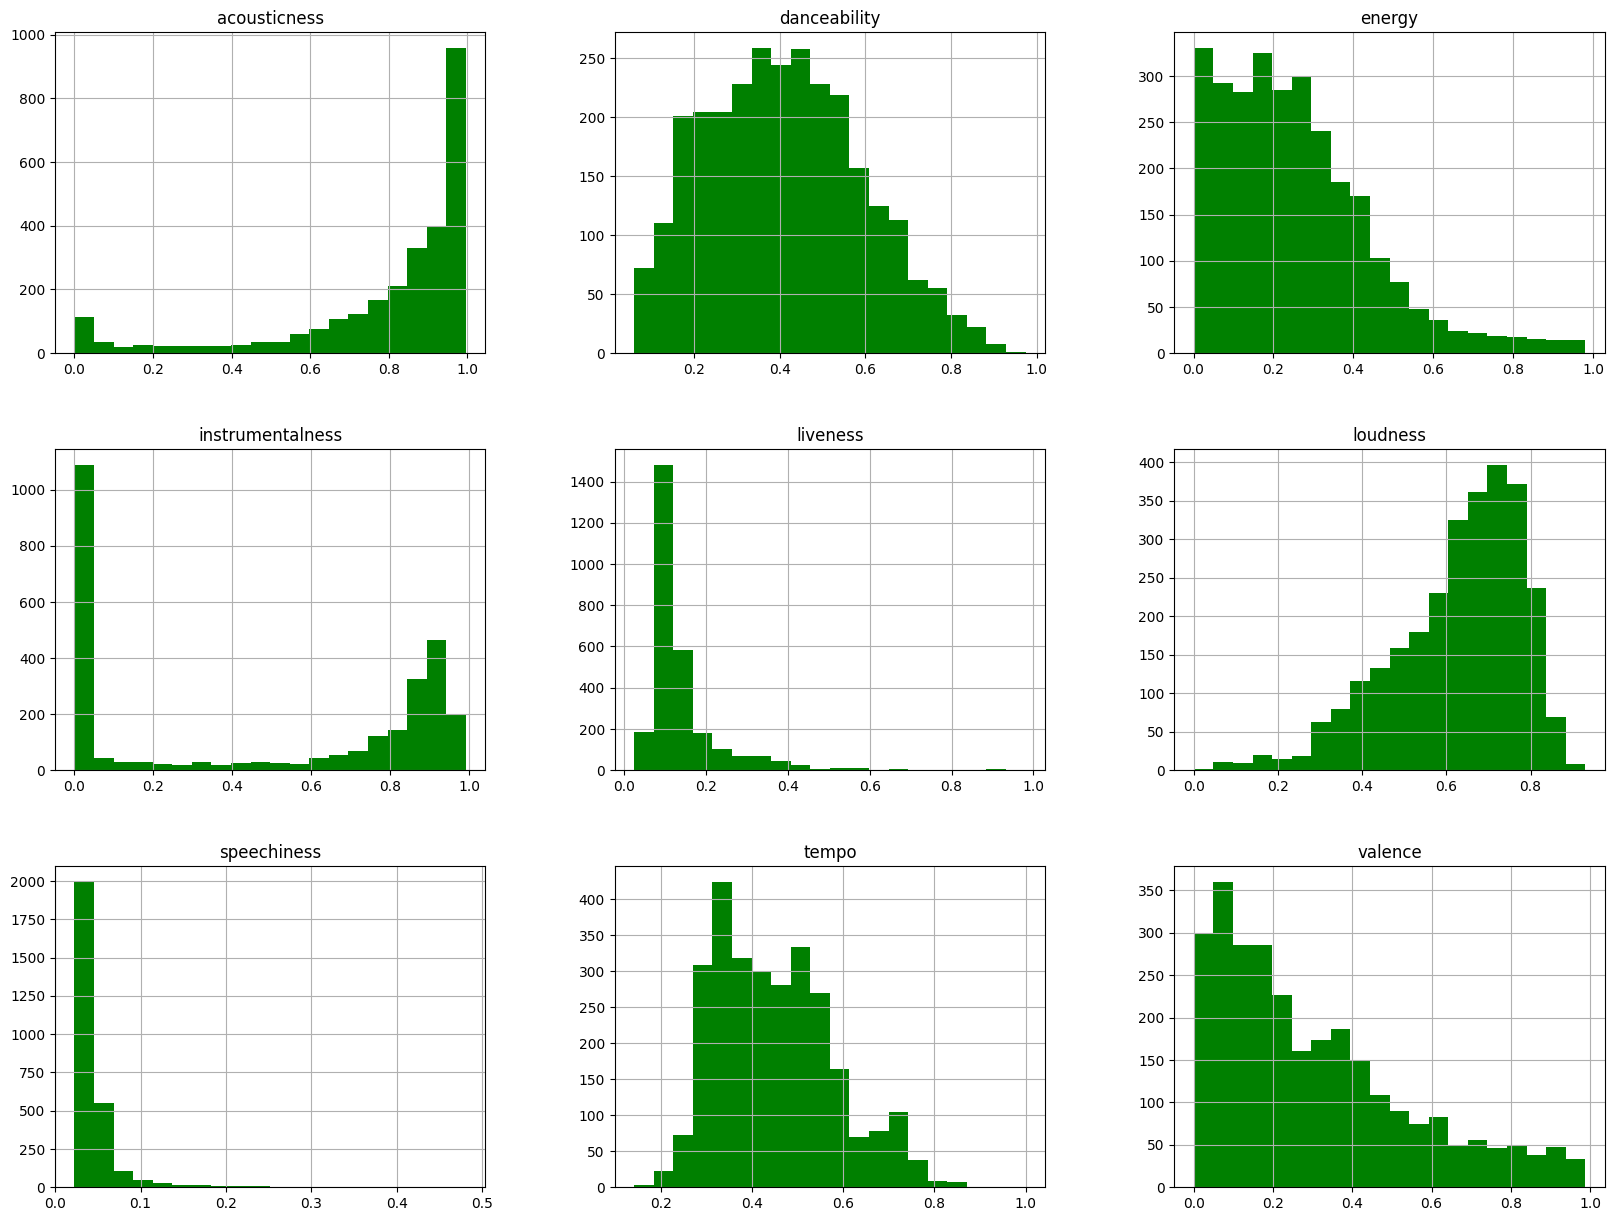

In [16]:
cluster1 = sub_df[sub_df['cluster'] == 0]
cluster2 = sub_df[sub_df['cluster'] == 1]
cluster1[features].hist(bins=20, figsize=(20, 15), color='red')
plt.show()
cluster2[features].hist(bins=20, figsize=(20, 15), color='green')
plt.show()

Investigate the difference between clusters

In [31]:
# TODO

Approach #2: Clustering using K-medoids